# 01. Import Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/nikolinastekovic/Library/CloudStorage/OneDrive-Personal/CF DATA ANALYICS/Immerse/4-Python/Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

# 02. Creating Bar Charts

<Axes: xlabel='Day_of_order'>

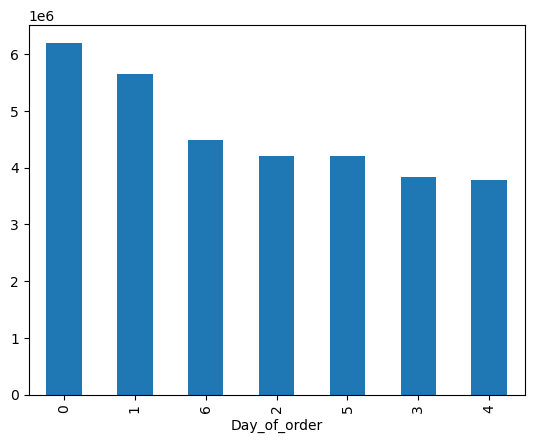

In [5]:
ords_prods_merge['Day_of_order'].value_counts().plot.bar()

<Axes: xlabel='Day_of_order'>

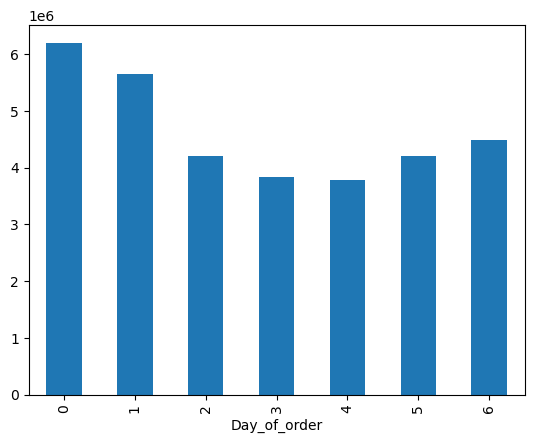

In [7]:
# sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).
ords_prods_merge['Day_of_order'].value_counts().sort_index().plot.bar()

In [9]:
#same for printig frequencies
ords_prods_merge['Day_of_order'].value_counts().sort_index()

Day_of_order
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='Day_of_order'>

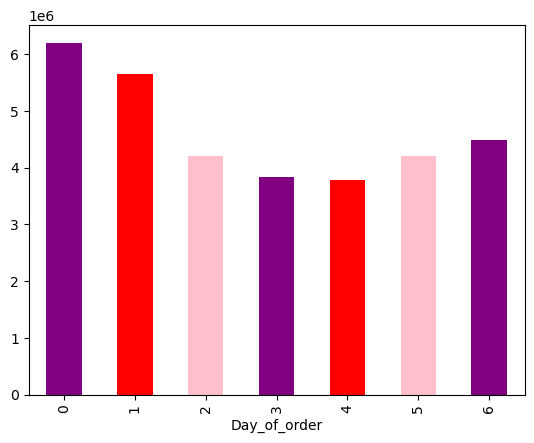

In [15]:
ords_prods_merge['Day_of_order'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink'])

## EXPORTING CHARTS

Text(0, 0.5, 'Orders')

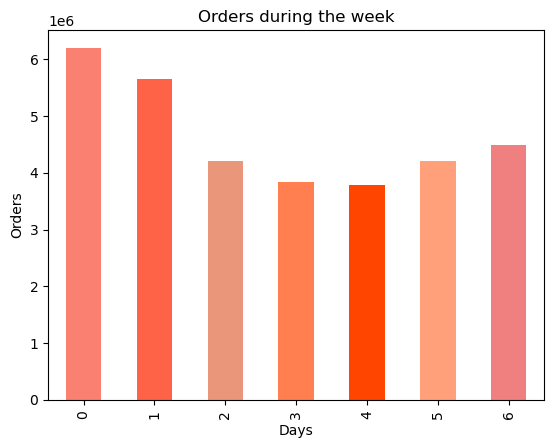

In [6]:
#save chart as a bar object
bar = ords_prods_merge['Day_of_order'].value_counts().sort_index().plot.bar(color=['salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'lightcoral'])
plt.title("Orders during the week")
plt.xlabel("Days")
plt.ylabel("Orders")

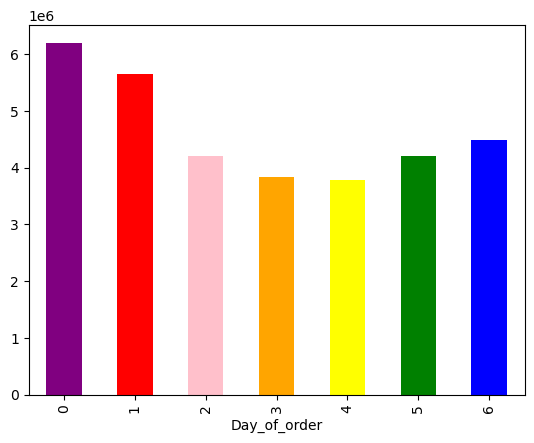

In [13]:
#call it with:
bar.figure

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 03. Creating Histograms and Scatterplots


### HISTOGRAM

<Axes: ylabel='Frequency'>

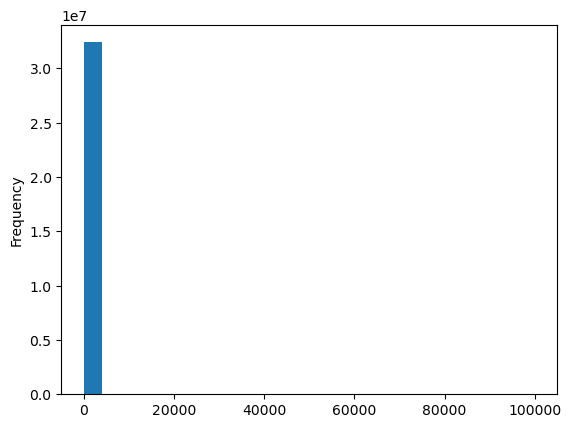

In [21]:
ords_prods_merge['prices'].plot.hist(bins = 25)


### SCATTERPLOT

In [19]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

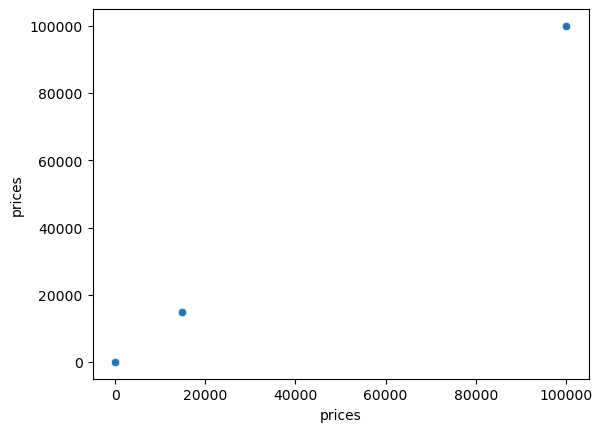

In [20]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [22]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]


,order_id,user_id,order_number,Day_of_order,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,price_mean,spending_flag,median_days,frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [23]:
# This is a function from the NumPy library; it’s used to assign missing values.
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
ords_prods_merge['prices'].max()

25.0

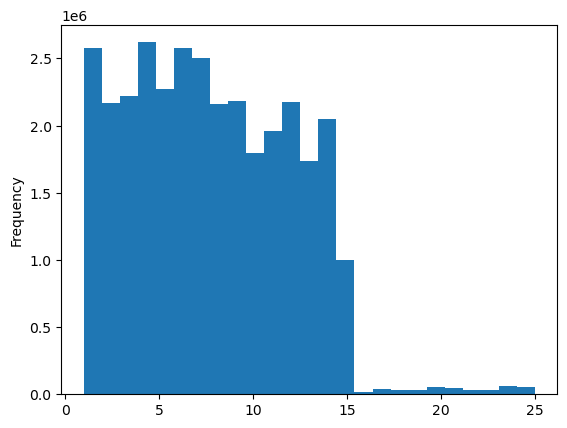

In [26]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)


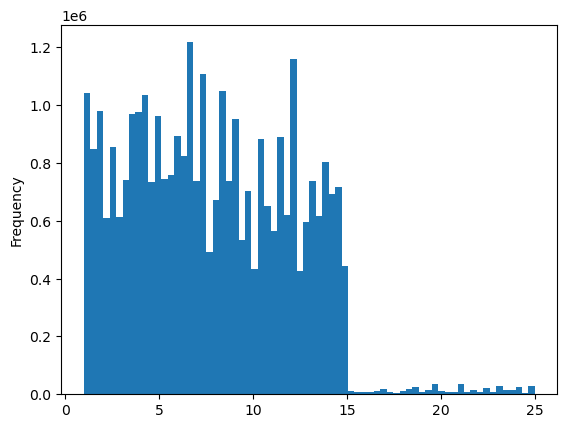

In [27]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)


In [28]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram.png'))

# 04. Creating Line Charts


## SAMPLING DATA

In [29]:
# Create a list holding True/False values to the test np.random.rant()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [33]:
#the np.random.rand() function produces a list of random numbers between 0 and 1.
np.random.rand(10)

array([0.99588525, 0.68895442, 0.9491469 , 0.63012328, 0.9192488 ,
       0.87788077, 0.3936537 , 0.64745848, 0.73786691, 0.61518855])

In [34]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]


In [35]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [37]:
#This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.

df_2 = small[['Day_of_order','prices']]


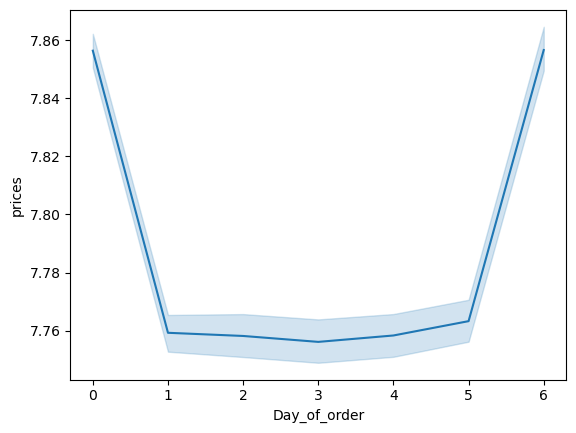

In [39]:
line = sns.lineplot(data = df_2, x = 'Day_of_order',y = 'prices')